In [22]:
import pandas as pd

In [23]:
data = pd.read_csv('data_all_v2.csv')
data = data.drop(['Unnamed: 0','prischool_rank','secschool_rank'], axis=1)
data['resale_price_per_sqm'] = data['resale_price']/data['floor_area_sqm']
data

C:\Users\hetin\AppData\Local\Temp\ipykernel_2144\1096739687.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data_all_v2.csv')


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,...,prischool_distance,secschool_name,secschool_distance,mrt_name,mrt_distance,mall_name,mall_distance,centre_name,centre_distance,resale_price_per_sqm
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0,...,0.210347,Presbyterian High School,0.231945,lentor,0.280099,Djitsun Mall,0.809798,Sengkang West,1.484109,2130.434783
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0,...,0.210347,Presbyterian High School,0.231945,lentor,0.280099,Djitsun Mall,0.809798,Sengkang West,1.484109,2360.655738
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0,...,0.261512,Mayflower Secondary School,0.170813,bright hill,0.277043,Broadway Plaza,0.667424,Bishan,1.281141,2178.082192
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0,...,0.261512,Mayflower Secondary School,0.170813,bright hill,0.277043,Broadway Plaza,0.667424,Bishan,1.281141,2287.671233
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0,...,0.261512,Mayflower Secondary School,0.170813,bright hill,0.277043,Broadway Plaza,0.667424,Bishan,1.281141,2432.835821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572103,2022-04,YISHUN,EXECUTIVE,826,YISHUN ST 81,01 TO 03,142.0,Apartment,1988,739388.0,...,0.117145,Orchid Park Secondary School,0.062228,khatib,0.294319,Wisteria Mall,0.303242,Seletar Regional Centre,1.648202,5206.957746
572104,2022-04,YISHUN,EXECUTIVE,836,YISHUN ST 81,07 TO 09,142.0,Apartment,1988,773000.0,...,0.117145,Orchid Park Secondary School,0.062228,khatib,0.294319,Wisteria Mall,0.303242,Seletar Regional Centre,1.648202,5443.661972
572105,2022-01,YISHUN,MULTI-GENERATION,633,YISHUN ST 61,04 TO 06,164.0,Multi Generation,1987,785000.0,...,0.216283,Chung Cheng High School (Yishun),0.170171,khatib,0.375820,Wisteria Mall,0.355197,Seletar Regional Centre,1.855655,4786.585366
572106,2022-02,YISHUN,MULTI-GENERATION,633,YISHUN ST 61,04 TO 06,171.0,Multi Generation,1987,842000.0,...,0.216283,Chung Cheng High School (Yishun),0.170171,khatib,0.375820,Wisteria Mall,0.355197,Seletar Regional Centre,1.855655,4923.976608


In [24]:
import numpy as np
print(np.corrcoef(data['prischool_distance'],data['secschool_distance']))
print(data['prischool_distance'],data['secschool_distance'])

[[1.         0.28514928]
 [0.28514928 1.        ]]
0         0.210347
1         0.210347
2         0.261512
3         0.261512
4         0.261512
            ...   
572103    0.117145
572104    0.117145
572105    0.216283
572106    0.216283
572107    0.216283
Name: prischool_distance, Length: 572108, dtype: float64 0         0.231945
1         0.231945
2         0.170813
3         0.170813
4         0.170813
            ...   
572103    0.062228
572104    0.062228
572105    0.170171
572106    0.170171
572107    0.170171
Name: secschool_distance, Length: 572108, dtype: float64


In [25]:
# Target variable: price per sqm
data['psm'] = data['resale_price']/data['floor_area_sqm']
data['date'] = data['month'].map(lambda x: x+'-01')
data['date'] = pd.to_datetime(data['date'])
data['quarter'] = data['date'].dt.to_period("Q").dt.start_time

In [26]:
allColumns = data.columns
data.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease', 'lat', 'lng', 'UST', 'prischool_name',
       'prischool_distance', 'secschool_name', 'secschool_distance',
       'mrt_name', 'mrt_distance', 'mall_name', 'mall_distance', 'centre_name',
       'centre_distance', 'resale_price_per_sqm', 'psm', 'date', 'quarter'],
      dtype='object')

In [27]:
pd.DataFrame(data.median())

C:\Users\hetin\AppData\Local\Temp\ipykernel_2144\202241160.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  pd.DataFrame(data.median())
C:\Users\hetin\AppData\Local\Temp\ipykernel_2144\202241160.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pd.DataFrame(data.median())


,0
floor_area_sqm,98.000000
lease_commence_date,1988.000000
resale_price,326000.000000
lat,1.358716
lng,103.844932
UST,3.505000
prischool_distance,0.210347
secschool_distance,0.246278
mrt_distance,0.369484
mall_distance,0.339478


In [28]:
numeric = data.describe()
numeric.T

,count,mean,std,min,25%,50%,75%,max
floor_area_sqm,572108.0,97.162944,24.995636,28.000000,74.000000,98.000000,114.000000,2.970000e+02
lease_commence_date,572108.0,1990.051934,10.704766,1966.000000,1983.000000,1988.000000,1998.000000,2.019000e+03
resale_price,572108.0,347780.282119,152778.996924,28000.000000,235000.000000,326000.000000,430000.000000,1.388889e+06
lat,572108.0,1.365778,0.042139,1.272321,1.336973,1.358716,1.389801,1.454984e+00
lng,572108.0,103.838232,0.074028,103.687191,103.772179,103.844932,103.896792,1.039873e+02
UST,572108.0,3.405108,1.396425,0.559000,2.202000,3.505000,4.523000,6.630000e+00
prischool_distance,572108.0,0.240463,0.150490,0.022275,0.145544,0.210347,0.303080,1.693743e+00
secschool_distance,572108.0,0.286107,0.179450,0.047163,0.163580,0.246278,0.362085,1.814757e+00
mrt_distance,572108.0,0.417521,0.244333,0.005373,0.235687,0.369484,0.578008,2.067873e+00
mall_distance,572108.0,0.378150,0.228869,0.027180,0.214173,0.339478,0.498152,1.877617e+00


In [29]:
numColumns = numeric.columns
numeric.columns

Index(['floor_area_sqm', 'lease_commence_date', 'resale_price', 'lat', 'lng',
       'UST', 'prischool_distance', 'secschool_distance', 'mrt_distance',
       'mall_distance', 'centre_distance', 'resale_price_per_sqm', 'psm'],
      dtype='object')

In [30]:
catColumns = set(allColumns) - set(numColumns)
print(len(catColumns))
catColumns

15


{'block',
 'centre_name',
 'date',
 'flat_model',
 'flat_type',
 'mall_name',
 'month',
 'mrt_name',
 'prischool_name',
 'quarter',
 'remaining_lease',
 'secschool_name',
 'storey_range',
 'street_name',
 'town'}

In [31]:
data.isna().describe()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,...,mrt_name,mrt_distance,mall_name,mall_distance,centre_name,centre_distance,resale_price_per_sqm,psm,date,quarter
count,572108,572108,572108,572108,572108,572108,572108,572108,572108,572108,...,572108,572108,572108,572108,572108,572108,572108,572108,572108,572108
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,572108,572108,572108,572108,572108,572108,572108,572108,572108,572108,...,572108,572108,572108,572108,572108,572108,572108,572108,572108,572108


# Ploting different graphs

In [32]:
quarter_avg = data[['resale_price_per_sqm', 'quarter']].groupby(['quarter']).mean()/1000
interest_avg = data[['UST','quarter']].groupby(['quarter']).mean()

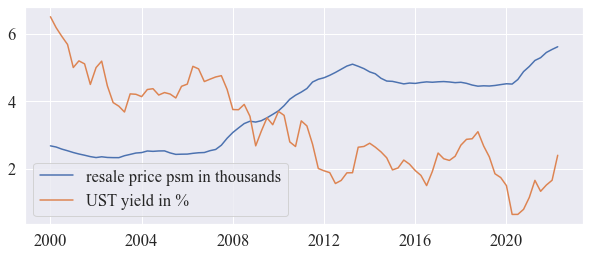

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize = (10,4))

ax.plot(quarter_avg, label = 'resale price psm in thousands') 
ax.plot(interest_avg,label='UST yield in %')
ax.legend() 
plt.show()

<AxesSubplot: ylabel='Frequency'>

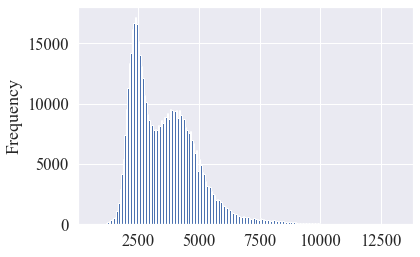

In [34]:
data['resale_price_per_sqm'].plot.hist(bins=200)

In [35]:
towns = list(data['town'].unique())
towns

['ANG MO KIO',
 'BEDOK',
 'BISHAN',
 'BUKIT BATOK',
 'BUKIT MERAH',
 'BUKIT PANJANG',
 'BUKIT TIMAH',
 'CENTRAL AREA',
 'CHOA CHU KANG',
 'CLEMENTI',
 'GEYLANG',
 'HOUGANG',
 'JURONG EAST',
 'JURONG WEST',
 'KALLANG/WHAMPOA',
 'MARINE PARADE',
 'PASIR RIS',
 'QUEENSTOWN',
 'SENGKANG',
 'SERANGOON',
 'TAMPINES',
 'TOA PAYOH',
 'WOODLANDS',
 'YISHUN',
 'SEMBAWANG',
 'PUNGGOL']

In [36]:
town_sqm = pd.DataFrame(data.groupby('town')['resale_price_per_sqm'].mean())
town_mean = pd.DataFrame(data.groupby('town')['resale_price'].mean())
town_sqm

,resale_price_per_sqm
town,
ANG MO KIO,3620.124525
BEDOK,3560.017100
BISHAN,4264.719931
BUKIT BATOK,3239.184012
BUKIT MERAH,4895.600040
BUKIT PANJANG,3348.508561
BUKIT TIMAH,4608.919563
CENTRAL AREA,5386.063607
CHOA CHU KANG,3091.570758


In [37]:
import requests
import urllib.parse

lat = []; lng = []
for town in towns:
    url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(town) +'?format=json'
    response = requests.get(url).json()
    lat.append(response[0]["lat"])
    lng.append(response[0]["lon"])
print(lat,lng)

['1.3700803', '1.3239765', '1.3509859', '1.3490572', '4.5523732', '1.3791486', '1.3546901', '36.5070827', '1.3847493', '1.3151003', '1.3181862', '1.3708011', '1.333108', '1.3434392', '1.329832', '1.3026889', '1.3730307', '-45.0321923', '1.3919236499999998', '1.3497610500000001', '1.3546528', '1.3353906', '54.3558467', '1.4293839', '1.4490928', '1.4051559'] ['103.8495228', '103.930216', '103.84825507492937', '103.7495906', '101.0408667', '103.76141301431002', '103.7763724', '-79.7447575', '103.7445341', '103.7652311', '103.8870563', '103.89254433997465', '103.7422939', '103.7058663', '103.862424', '103.9073952', '103.949255', '168.661', '103.89549093760694', '103.87368414801405', '103.9435712', '103.8497414', '-115.2252675', '103.8350282', '103.8200555', '103.90236801879885']


In [38]:
# Obviously there is sth wrong for central area(idx = 7), Bukit Merah(idx=4), queenstown(idx = 17), fix it by manually searching in google maps
lat[4] = 1.278226
lng[4] = 103.815446
lat[7] = 1.2788417828609218
lng[7] = 103.85087598620309
lat[17] = 1.2937483972201174
lng[17] = 103.78593280434582
new = pd.DataFrame([lat,lng]).T
new.columns = ['lat','lng']
new.index = town_sqm.index
new['resale_price_per_sqm'] = town_sqm['resale_price_per_sqm']
new['resale_price'] = town_mean['resale_price']
new.sort_values(by=['resale_price_per_sqm'], inplace = True, ascending = False)
new

,lat,lng,resale_price_per_sqm,resale_price
town,,,,
CENTRAL AREA,1.278842,103.850876,5386.063607,422376.150002
BUKIT MERAH,1.278226,103.815446,4895.600040,425026.506371
QUEENSTOWN,1.3919236499999998,103.89549093760694,4865.129937,404151.715560
MARINE PARADE,1.3026889,103.9073952,4625.709427,401668.730011
PUNGGOL,1.293748,103.785933,4616.485302,457151.201867
BUKIT TIMAH,1.3546901,103.7763724,4608.919563,499386.278879
BISHAN,1.3509859,103.84825507492937,4264.719931,452931.309944
KALLANG/WHAMPOA,1.329832,103.862424,4242.538565,364485.239871
TOA PAYOH,1.4293839,103.8350282,4117.287902,358411.543500


<AxesSubplot: xlabel='resale_price_per_sqm', ylabel='town'>

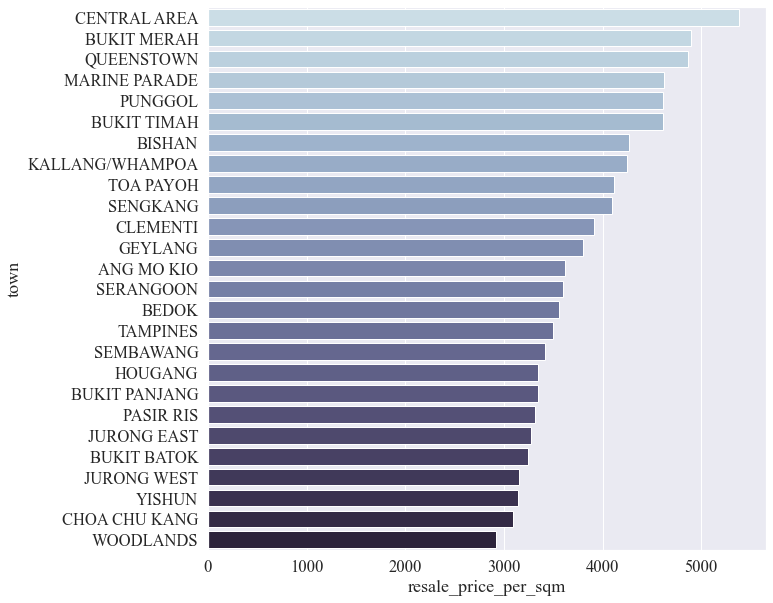

In [39]:
plt.figure(figsize=(10,10))
sns.barplot(x="resale_price_per_sqm", y=new.index, data=new, palette = "ch:s=.25,rot=-.25")

In [40]:
import folium
m = folium.Map(location=[1.28333, 103.85],tiles='Stamen Toner')
for line in new.iterrows():
    folium.Marker(
    location=[line[1]['lat'], line[1]['lng']],
    popup= line[0]+": resale price: "+str(int(line[1]['resale_price']))+"\nper sqm: " + str(int(line[1]['resale_price_per_sqm'])) ,
    ).add_to(m)
m

In [41]:
# correlation matrix
data_new = data.drop(['floor_area_sqm','lat','lng','prischool_distance','psm'], axis = 1)
corr_matrix = data_new.corr()
corr_matrix

,lease_commence_date,resale_price,UST,secschool_distance,mrt_distance,mall_distance,centre_distance,resale_price_per_sqm
lease_commence_date,1.000000,0.446171,-0.241299,-0.076133,0.175672,-0.243363,0.017081,0.276464
resale_price,0.446171,1.000000,-0.580714,0.050217,0.023043,-0.100386,-0.108748,0.790571
UST,-0.241299,-0.580714,1.000000,0.011975,-0.074565,0.036016,-0.015781,-0.701402
secschool_distance,-0.076133,0.050217,0.011975,1.000000,0.040009,0.072841,-0.091671,0.086465
mrt_distance,0.175672,0.023043,-0.074565,0.040009,1.000000,0.129770,0.045949,-0.023418
mall_distance,-0.243363,-0.100386,0.036016,0.072841,0.129770,1.000000,0.093554,-0.040672
centre_distance,0.017081,-0.108748,-0.015781,-0.091671,0.045949,0.093554,1.000000,-0.102721
resale_price_per_sqm,0.276464,0.790571,-0.701402,0.086465,-0.023418,-0.040672,-0.102721,1.000000


<AxesSubplot: >

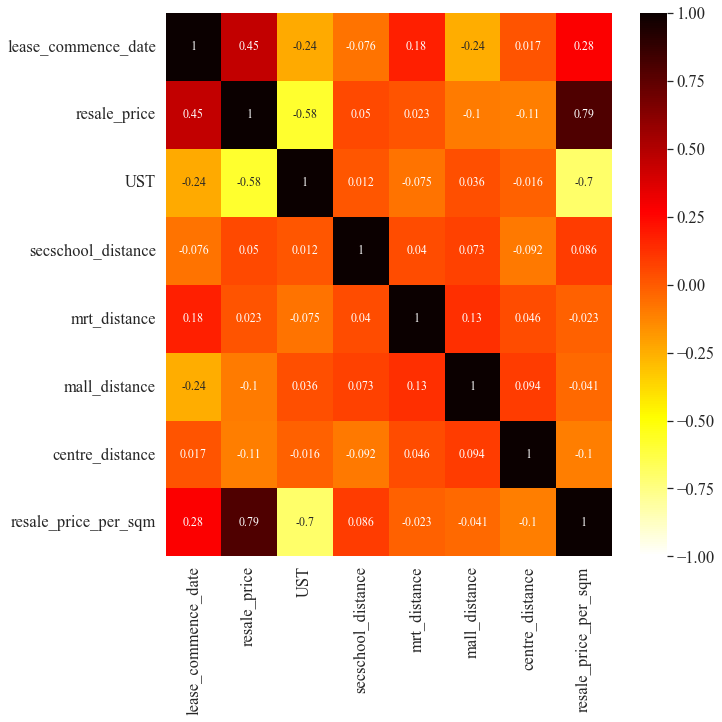

In [42]:
# heatmap of the matrix
plt.figure(figsize=(10,10))
sns.set(font_scale = 1.5)
plt.rc('font',family = 'Times New Roman',size = 12)
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True,cmap = 'hot_r')